In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind

In [159]:
ecs_df = pd.read_csv('education_career_success.csv')
ecs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [160]:
ecs_df.isnull().any()

Student_ID               False
Age                      False
Gender                   False
High_School_GPA          False
SAT_Score                False
University_Ranking       False
University_GPA           False
Field_of_Study           False
Internships_Completed    False
Projects_Completed       False
Certifications           False
Soft_Skills_Score        False
Networking_Score         False
Job_Offers               False
Starting_Salary          False
Career_Satisfaction      False
Years_to_Promotion       False
Current_Job_Level        False
Work_Life_Balance        False
Entrepreneurship         False
dtype: bool

In [161]:
duplicate_rows = ecs_df[ecs_df.duplicated()]
print(duplicate_rows)
print(f"Number of duplicate rows: {ecs_df.duplicated().sum()}")

Empty DataFrame
Columns: [Student_ID, Age, Gender, High_School_GPA, SAT_Score, University_Ranking, University_GPA, Field_of_Study, Internships_Completed, Projects_Completed, Certifications, Soft_Skills_Score, Networking_Score, Job_Offers, Starting_Salary, Career_Satisfaction, Years_to_Promotion, Current_Job_Level, Work_Life_Balance, Entrepreneurship]
Index: []
Number of duplicate rows: 0


In [162]:
#check for misspellings/doubled categories
columns = ecs_df.columns.tolist()
for i in range(len(columns)):
    unique = ecs_df[columns[i]].unique()
    print(f"{columns[i]}: {unique}\n")


Student_ID: ['S00001' 'S00002' 'S00003' ... 'S04998' 'S04999' 'S05000']

Age: [24 21 28 25 22 27 20 23 19 29 18 26]

Gender: ['Male' 'Other' 'Female']

High_School_GPA: [3.58 2.52 3.42 2.43 2.08 2.4  2.36 2.68 2.84 3.02 2.95 2.54 2.06 3.21
 2.79 2.6  3.73 3.49 3.72 2.99 2.26 3.39 2.41 2.88 2.13 3.65 2.25 3.81
 2.93 3.24 3.61 2.86 3.57 2.92 3.88 2.97 3.64 3.11 2.94 3.94 3.51 3.62
 2.07 3.29 3.66 2.1  3.7  3.1  2.39 2.63 2.56 3.06 2.32 3.63 2.27 2.47
 2.91 3.03 3.53 2.89 2.23 2.31 2.87 3.16 2.78 2.34 2.45 3.15 2.85 3.33
 3.71 2.98 3.95 2.67 3.19 2.18 3.92 3.43 3.41 3.18 2.9  3.91 3.   3.86
 3.17 3.08 2.42 2.01 2.48 2.76 3.96 2.7  3.55 3.14 3.52 2.3  2.51 2.46
 2.02 2.62 3.97 2.49 2.04 3.28 2.83 3.31 3.38 3.13 3.35 3.89 2.28 2.66
 3.8  3.99 3.04 2.59 2.03 2.44 3.75 2.17 3.3  2.5  3.44 2.37 3.47 2.
 3.83 2.58 2.64 3.85 3.69 3.07 2.05 3.56 3.36 3.27 3.82 2.65 3.78 3.76
 3.32 2.8  2.75 2.19 2.81 3.54 3.79 3.84 2.55 2.57 2.14 2.35 2.69 2.12
 3.77 3.34 3.48 3.09 2.82 3.37 2.21 3.9  2.2  3.01 3

In [163]:
for i in range(len(columns)):
    unique_count = ecs_df[columns[i]].value_counts()
    print(f"{columns[i]}: {unique_count}\n")

Student_ID: Student_ID
S05000    1
S00001    1
S00002    1
S00003    1
S00004    1
         ..
S00013    1
S00012    1
S00011    1
S00010    1
S00009    1
Name: count, Length: 5000, dtype: int64

Age: Age
18    453
29    440
20    434
22    432
23    421
26    420
25    417
21    406
27    403
19    402
24    394
28    378
Name: count, dtype: int64

Gender: Gender
Male      2458
Female    2350
Other      192
Name: count, dtype: int64

High_School_GPA: High_School_GPA
3.72    40
2.94    37
2.34    37
2.43    37
2.90    36
        ..
4.00    16
3.37    16
3.24    15
2.00    11
3.93    10
Name: count, Length: 201, dtype: int64

SAT_Score: SAT_Score
1319    17
1010    16
1011    16
916     15
1593    15
        ..
1135     1
1535     1
1369     1
1485     1
1249     1
Name: count, Length: 700, dtype: int64

University_Ranking: University_Ranking
816    13
988    13
970    12
397    12
996    12
       ..
26      1
346     1
584     1
188     1
206     1
Name: count, Length: 993, dtype: int

In [164]:
n = 250
ecs_sample_df = ecs_df.sample(n, random_state=8)
ecs_sample_df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
2735,S02736,23,Male,3.89,1474,300,3.73,Business,4,9,4,9,7,3,68800.0,7,5,Mid,8,No
4027,S04028,19,Female,2.23,1252,165,3.17,Computer Science,2,2,2,7,1,5,42200.0,5,4,Entry,9,No
1648,S01649,25,Female,3.02,1418,725,2.04,Business,3,3,5,4,1,1,55000.0,3,3,Entry,7,Yes
1746,S01747,27,Female,2.46,1301,269,2.02,Engineering,4,9,3,7,1,1,50400.0,6,4,Senior,7,No
4640,S04641,28,Male,2.57,1513,84,3.93,Arts,0,9,2,10,3,2,45600.0,2,4,Entry,3,No


1. How do academic performance metrics (GPA and SAT) correlate with career success 

In [165]:
#Measure of dispurtion 
agg = ecs_df.agg({
    'High_School_GPA': ['var', 'std'],
    'University_GPA': ['var', 'std'],
    'SAT_Score': ['var', 'std'],
    'Starting_Salary': ['var', 'std'],
    'Job_Offers': ['var', 'std'],
    'Years_to_Promotion': ['var', 'std']
})

#display dispurtion measures 
for col in agg.columns:
    variance = agg.loc['var', col]
    std = agg.loc['std', col]

    print(f"{col} - Variance: {variance:.2f}")
    print(f"{col} - Standard Deviation: {std:.2f}\n")


High_School_GPA - Variance: 0.33
High_School_GPA - Standard Deviation: 0.58

University_GPA - Variance: 0.33
University_GPA - Standard Deviation: 0.58

SAT_Score - Variance: 41302.01
SAT_Score - Standard Deviation: 203.23

Starting_Salary - Variance: 210103813.43
Starting_Salary - Standard Deviation: 14494.96

Job_Offers - Variance: 2.93
Job_Offers - Standard Deviation: 1.71

Years_to_Promotion - Variance: 2.01
Years_to_Promotion - Standard Deviation: 1.42



In [166]:
correlation_matrix = ecs_sample_df[['High_School_GPA', 'University_GPA', 'SAT_Score', 'Starting_Salary']].corr()
correlation_matrix

,High_School_GPA,University_GPA,SAT_Score,Starting_Salary
High_School_GPA,1.000000,0.085032,0.017953,0.025223
University_GPA,0.085032,1.000000,0.115789,-0.012260
SAT_Score,0.017953,0.115789,1.000000,0.002371
Starting_Salary,0.025223,-0.012260,0.002371,1.000000


Text(0.5, 1.0, 'Relationship of High School GPA and Starting_Salary')

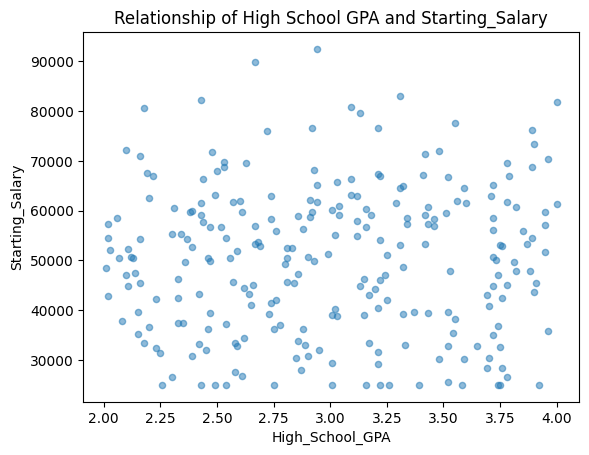

In [167]:
ecs_sample_df.plot.scatter(x='High_School_GPA', y='Starting_Salary', alpha=0.5)
plt.title('Relationship of High School GPA and Starting_Salary')

Text(0.5, 1.0, 'Relationship of SAT Score and Starting_Salary')

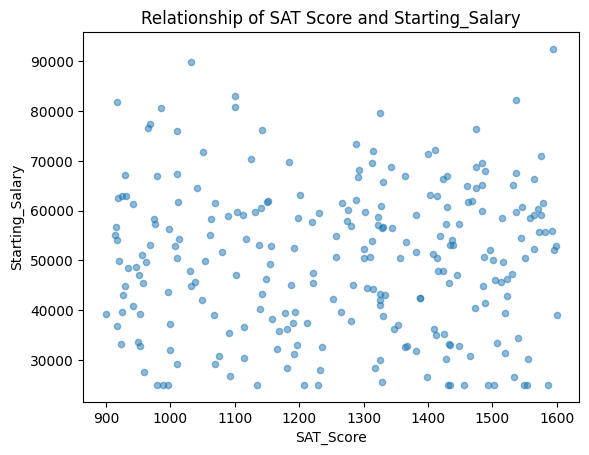

In [168]:
ecs_sample_df.plot.scatter(x='SAT_Score', y='Starting_Salary', alpha=0.5)
plt.title('Relationship of SAT Score and Starting_Salary')

Text(0.5, 1.0, 'Relationship of University GPA and Starting_Salary')

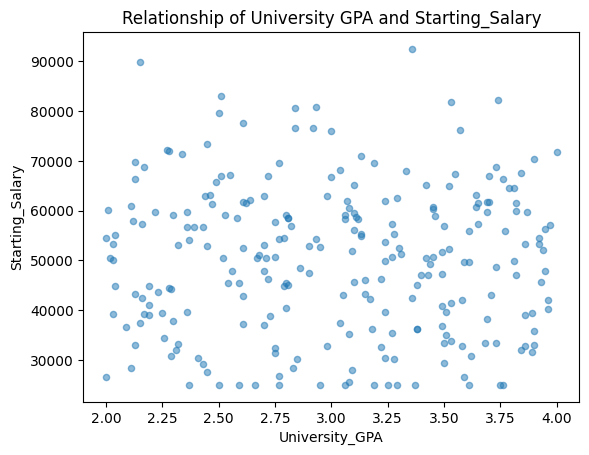

In [169]:
ecs_sample_df.plot.scatter(x='University_GPA', y='Starting_Salary', alpha=0.5)
plt.title('Relationship of University GPA and Starting_Salary')

2. What is the impact of internships and projects on career success?

In [170]:
agg = ecs_sample_df.agg({
    'Internships_Completed': ['mean', 'median', 'std', 'var'],
    'Projects_Completed': ['mean', 'median', 'std', 'var'],
    'Job_Offers': ['mean', 'median', 'std', 'var'],
    'Starting_Salary': ['mean', 'median', 'std', 'var'],
})

agg

,Internships_Completed,Projects_Completed,Job_Offers,Starting_Salary
mean,2.044000,4.944000,2.404000,5.010520e+04
median,2.000000,5.000000,2.000000,5.065000e+04
std,1.394936,2.819337,1.686464,1.478967e+04
var,1.945847,7.948659,2.844161,2.187344e+08


In [171]:
correlation_matrix = ecs_sample_df[['Internships_Completed', 'Projects_Completed', 'Job_Offers', 'Starting_Salary']].corr()
correlation_matrix

,Internships_Completed,Projects_Completed,Job_Offers,Starting_Salary
Internships_Completed,1.000000,0.054751,0.082892,0.045794
Projects_Completed,0.054751,1.000000,-0.029853,0.073341
Job_Offers,0.082892,-0.029853,1.000000,0.033358
Starting_Salary,0.045794,0.073341,0.033358,1.000000


In [172]:
grouped = ecs_sample_df.groupby(['Internships_Completed', 'Projects_Completed']).agg({
    'Job_Offers': 'mean',
    'Starting_Salary': 'mean',
})
grouped

Job_Offers  Starting_Salary
Internships_Completed Projects_Completed                             
0                     0                     2.666667     32633.333333
                      1                     2.200000     57500.000000
                      2                     2.333333     37833.333333
                      3                     2.000000     39585.714286
                      4                     2.500000     57500.000000
                      5                     0.000000     50700.000000
                      6                     1.200000     43940.000000
                      7                     1.333333     56300.000000
                      8                     2.000000     42342.857143
                      9                     3.000000     58000.000000
1                     0                     0.500000     49500.000000
                      1                     3.000000     42383.333333
                      2                     3.000000     53720.000000
                      3                     3.500000     57800.000000
                      4                     2.833333     55700.000000
                      5                     2.285714     55271.428571
                      6                     2.166667     57050.000000
                      7                     2.000000     42920.000000
                      8                     1.875000     51837.500000
                      9                     2.600000     40220.000000
2                     0                     2.000000     47225.000000
                      1                     1.666667     52866.666667
                      2                     2.500000     51550.000000
                      3                     2.500000     56700.000000
                      4                     2.333333     50600.000000
                      5                     1.888889     49055.555556
                      6                     2.500000     64250.000000
                      7                     2.285714     57557.142857
                      8                     3.200000     43660.000000
                      9                     2.555556     49366.666667
3                     0                     3.333333     30066.666667
                      1                     2.750000     51525.000000
                      2                     1.333333     53550.000000
                      3                     3.833333     55116.666667
                      4                     0.000000     58300.000000
                      5                     3.333333     59616.666667
                      6                     2.100000     56490.000000
                      7                     2.666667     52900.000000
                      8                     2.500000     58750.000000
                      9                     1.666667     40633.333333
4                     0                     4.000000     36250.000000
                      1                     2.166667     53700.000000
                      2                     3.500000     51800.000000
                      3                     1.750000     42050.000000
                      4                     3.000000     44977.777778
                      5                     0.500000     47300.000000
                      6                     2.200000     40380.000000
                      7                     2.250000     44000.000000
                      8                     2.000000     40900.000000
                      9                     2.916667     56991.666667

In [173]:
internship_vs_offers = ecs_sample_df.groupby('Internships_Completed')['Job_Offers'].mean()
projects_vs_salary = ecs_sample_df.groupby('Projects_Completed')['Starting_Salary'].mean()

<Figure size 800x500 with 0 Axes>

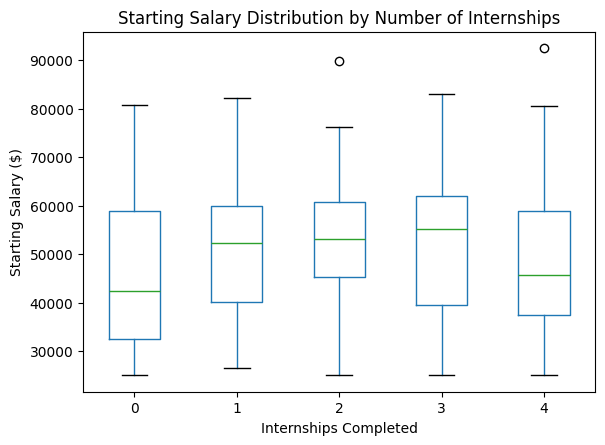

In [174]:
plt.figure(figsize=(8, 5))
ecs_sample_df.boxplot(column='Starting_Salary', by='Internships_Completed', grid=False)
plt.title('Starting Salary Distribution by Number of Internships')
plt.xlabel('Internships Completed')
plt.ylabel('Starting Salary ($)')
plt.suptitle('')
plt.show()

<Figure size 800x500 with 0 Axes>

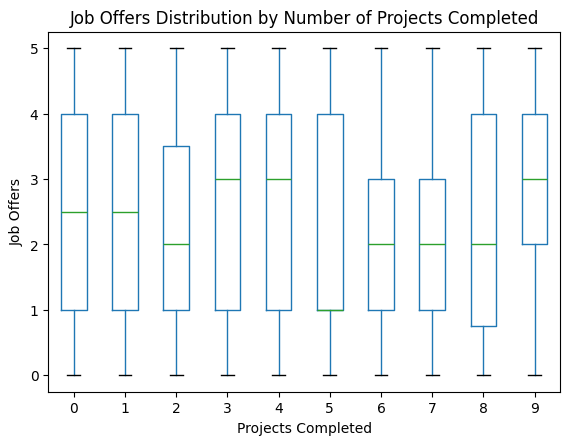

In [175]:
plt.figure(figsize=(8, 5))
ecs_sample_df.boxplot(column='Job_Offers', by='Projects_Completed', grid=False)
plt.title('Job Offers Distribution by Number of Projects Completed')
plt.xlabel('Projects Completed')
plt.ylabel('Job Offers')
plt.suptitle('')
plt.show()

3. Does university ranking significantly affect career outcomes?

In [176]:
salary_by_university = ecs_sample_df.groupby(pd.cut(ecs_sample_df['University_Ranking'], bins=[1, 100, 500, 1000]))['Starting_Salary'].mean()
salary_by_internships = ecs_sample_df.groupby('Internships_Completed')['Starting_Salary'].mean()
salary_by_field = ecs_sample_df.groupby('Field_of_Study')['Starting_Salary'].mean()
salary_by_entrepreneurship = ecs_sample_df.groupby('Entrepreneurship')['Starting_Salary'].mean()

print("\nAverage Starting Salary by University Ranking:\n", salary_by_university)
print("\nAverage Starting Salary by Number of Internships:\n", salary_by_internships)
print("\nAverage Starting Salary by Field of Study:\n", salary_by_field)
print("\nAverage Starting Salary for Entrepreneurs vs. Non-Entrepreneurs:\n", salary_by_entrepreneurship)


Average Starting Salary by University Ranking:
 University_Ranking
(1, 100]       48614.705882
(100, 500]     48873.118280
(500, 1000]    51448.780488
Name: Starting_Salary, dtype: float64

Average Starting Salary by Number of Internships:
 Internships_Completed
0    45865.116279
1    51116.071429
2    51864.000000
3    53132.653061
4    47978.846154
Name: Starting_Salary, dtype: float64

Average Starting Salary by Field of Study:
 Field_of_Study
Arts                53064.705882
Business            48485.000000
Computer Science    53983.333333
Engineering         48940.000000
Law                 47100.000000
Mathematics         53046.808511
Medicine            45352.631579
Name: Starting_Salary, dtype: float64

Average Starting Salary for Entrepreneurs vs. Non-Entrepreneurs:
 Entrepreneurship
No     50510.769231
Yes    48667.272727
Name: Starting_Salary, dtype: float64


C:\Users\Nicole\AppData\Local\Temp\ipykernel_27284\1343065153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_university = ecs_sample_df.groupby(pd.cut(ecs_sample_df['University_Ranking'], bins=[1, 100, 500, 1000]))['Starting_Salary'].mean()


In [177]:
bins = [1, 100, 300, 600, 1000]  
labels = ['Top 100', '101-300', '301-600', '601-1000']
ecs_sample_df['Ranking_Group'] = pd.cut(ecs_sample_df['University_Ranking'], bins=bins, labels=labels, include_lowest=True)

<Figure size 1200x600 with 0 Axes>

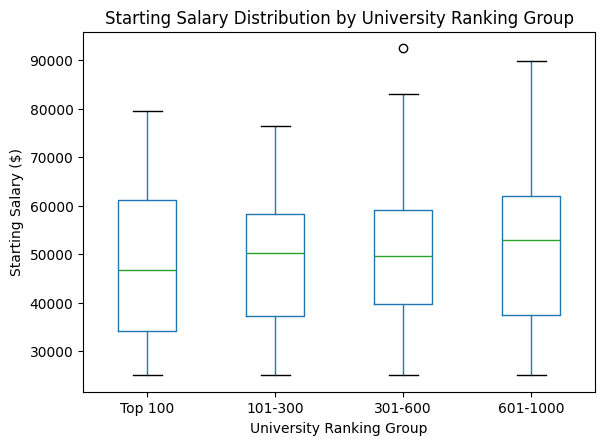

In [178]:
plt.figure(figsize=(12, 6))
ecs_sample_df.boxplot(column='Starting_Salary', by='Ranking_Group', grid=False)
plt.title('Starting Salary Distribution by University Ranking Group')
plt.xlabel('University Ranking Group')
plt.ylabel('Starting Salary ($)')
plt.suptitle('')
plt.show()

<Figure size 1200x600 with 0 Axes>

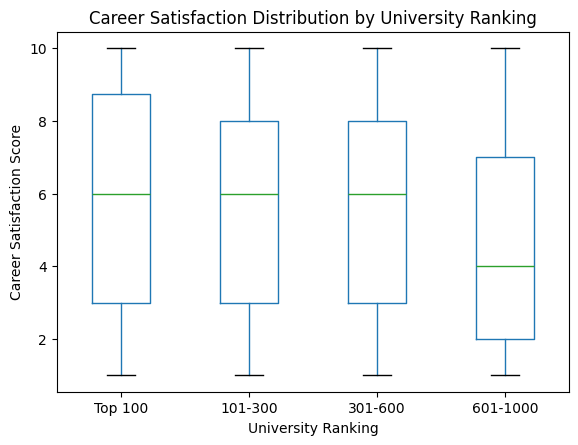

In [179]:
plt.figure(figsize=(12, 6))
ecs_sample_df.boxplot(column='Career_Satisfaction', by='Ranking_Group', grid=False)
plt.title('Career Satisfaction Distribution by University Ranking')
plt.xlabel('University Ranking')
plt.ylabel('Career Satisfaction Score')
plt.suptitle('')
plt.show()

4. How do soft skills networking affect job success? 

In [180]:
career_growth_stats = ecs_sample_df.agg({
    'Networking_Score': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Internships_Completed': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Job_Offers': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Starting_Salary': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Career_Satisfaction': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
})
career_growth_stats

,Networking_Score,Internships_Completed,Job_Offers,Starting_Salary,Career_Satisfaction
mean,5.476000,2.044000,2.404000,5.010520e+04,5.384000
median,5.000000,2.000000,2.000000,5.065000e+04,5.000000
std,2.931861,1.394936,1.686464,1.478967e+04,2.824972
var,8.595807,1.945847,2.844161,2.187344e+08,7.980466
<lambda>,9.000000,4.000000,5.000000,6.750000e+04,9.000000
<lambda>,5.000000,2.000000,3.000000,2.147500e+04,5.000000


In [181]:
correlation_matrix = ecs_sample_df[['Networking_Score', 'Internships_Completed', 'Job_Offers', 'Starting_Salary', 'Career_Satisfaction']].corr()
correlation_matrix

,Networking_Score,Internships_Completed,Job_Offers,Starting_Salary,Career_Satisfaction
Networking_Score,1.000000,-0.001214,-0.074787,-0.099057,0.139796
Internships_Completed,-0.001214,1.000000,0.082892,0.045794,0.066016
Job_Offers,-0.074787,0.082892,1.000000,0.033358,-0.041966
Starting_Salary,-0.099057,0.045794,0.033358,1.000000,-0.034739
Career_Satisfaction,0.139796,0.066016,-0.041966,-0.034739,1.000000


In [182]:
salary_by_networking = ecs_sample_df.groupby(pd.cut(ecs_sample_df['Networking_Score'], bins=[0, 3, 7, 10]))['Starting_Salary'].mean()
job_offers_by_internships = ecs_sample_df.groupby('Internships_Completed')['Job_Offers'].mean()
career_satisfaction_by_networking = ecs_sample_df.groupby(pd.cut(ecs_sample_df['Networking_Score'], bins=[0, 3, 7, 10]))['Career_Satisfaction'].mean()

print("\nAverage Starting Salary by Networking Score:\n", salary_by_networking)
print("\nAverage Job Offers by Internships Completed:\n", job_offers_by_internships)
print("\nAverage Career Satisfaction by Networking Score:\n", career_satisfaction_by_networking)


Average Starting Salary by Networking Score:
 Networking_Score
(0, 3]     52540.259740
(3, 7]     50039.583333
(7, 10]    47751.948052
Name: Starting_Salary, dtype: float64

Average Job Offers by Internships Completed:
 Internships_Completed
0    2.046512
1    2.482143
2    2.340000
3    2.530612
4    2.557692
Name: Job_Offers, dtype: float64

Average Career Satisfaction by Networking Score:
 Networking_Score
(0, 3]     4.935065
(3, 7]     5.302083
(7, 10]    5.935065
Name: Career_Satisfaction, dtype: float64


C:\Users\Nicole\AppData\Local\Temp\ipykernel_27284\2585518985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_networking = ecs_sample_df.groupby(pd.cut(ecs_sample_df['Networking_Score'], bins=[0, 3, 7, 10]))['Starting_Salary'].mean()
C:\Users\Nicole\AppData\Local\Temp\ipykernel_27284\2585518985.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  career_satisfaction_by_networking = ecs_sample_df.groupby(pd.cut(ecs_sample_df['Networking_Score'], bins=[0, 3, 7, 10]))['Career_Satisfaction'].mean()


In [183]:
salary_factors_stats = ecs_sample_df.agg({
    'University_Ranking': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'University_GPA': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'SAT_Score': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Internships_Completed': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Projects_Completed': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Networking_Score': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Job_Offers': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'Starting_Salary': ['mean', 'median', 'std', 'var', lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25)]
})
salary_factors_stats

,University_Ranking,University_GPA,SAT_Score,Internships_Completed,Projects_Completed,Networking_Score,Job_Offers,Starting_Salary
mean,473.480000,3.017080,1264.720000,2.044000,4.944000,5.476000,2.404000,5.010520e+04
median,499.000000,3.060000,1296.500000,2.000000,5.000000,5.000000,2.000000,5.065000e+04
std,284.470793,0.573281,208.643760,1.394936,2.819337,2.931861,1.686464,1.478967e+04
var,80923.632129,0.328651,43532.218474,1.945847,7.948659,8.595807,2.844161,2.187344e+08
<lambda>,980.000000,2.000000,700.000000,4.000000,9.000000,9.000000,5.000000,6.750000e+04
<lambda>,487.500000,0.975000,353.750000,2.000000,4.000000,5.000000,3.000000,2.147500e+04


In [184]:
correlation_salary = ecs_sample_df[['University_Ranking', 'University_GPA', 'SAT_Score', 'Internships_Completed', 'Projects_Completed', 'Networking_Score', 'Job_Offers', 'Starting_Salary']].corr()
correlation_salary

,University_Ranking,University_GPA,SAT_Score,Internships_Completed,Projects_Completed,Networking_Score,Job_Offers,Starting_Salary
University_Ranking,1.000000,0.000917,0.002319,0.093461,-0.005745,0.019217,0.010142,0.079741
University_GPA,0.000917,1.000000,0.115789,-0.095207,0.149581,0.099799,-0.098012,-0.012260
SAT_Score,0.002319,0.115789,1.000000,0.053858,-0.035310,0.026854,-0.104453,0.002371
Internships_Completed,0.093461,-0.095207,0.053858,1.000000,0.054751,-0.001214,0.082892,0.045794
Projects_Completed,-0.005745,0.149581,-0.035310,0.054751,1.000000,0.105754,-0.029853,0.073341
Networking_Score,0.019217,0.099799,0.026854,-0.001214,0.105754,1.000000,-0.074787,-0.099057
Job_Offers,0.010142,-0.098012,-0.104453,0.082892,-0.029853,-0.074787,1.000000,0.033358
Starting_Salary,0.079741,-0.012260,0.002371,0.045794,0.073341,-0.099057,0.033358,1.000000


In [185]:
salary_by_university_tier = ecs_sample_df.groupby(pd.cut(ecs_sample_df['University_Ranking'], bins=[0, 100, 500, 1000]))['Starting_Salary'].mean()
salary_by_gpa = ecs_sample_df.groupby(pd.cut(ecs_sample_df['University_GPA'], bins=[2.0, 2.9, 3.5, 4.0]))['Starting_Salary'].mean()
salary_by_internships = ecs_sample_df.groupby('Internships_Completed')['Starting_Salary'].mean()
salary_by_field = ecs_sample_df.groupby('Field_of_Study')['Starting_Salary'].mean()

print("\nAverage Starting Salary by University Tier:\n", salary_by_university_tier)
print("\nAverage Starting Salary by GPA Range:\n", salary_by_gpa)
print("\nAverage Starting Salary by Internships Completed:\n", salary_by_internships)
print("\nAverage Starting Salary by Field of Study:\n", salary_by_field)


Average Starting Salary by University Tier:
 University_Ranking
(0, 100]       48614.705882
(100, 500]     48873.118280
(500, 1000]    51448.780488
Name: Starting_Salary, dtype: float64

Average Starting Salary by GPA Range:
 University_GPA
(2.0, 2.9]    50514.678899
(2.9, 3.5]    49461.842105
(3.5, 4.0]    50476.190476
Name: Starting_Salary, dtype: float64

Average Starting Salary by Internships Completed:
 Internships_Completed
0    45865.116279
1    51116.071429
2    51864.000000
3    53132.653061
4    47978.846154
Name: Starting_Salary, dtype: float64

Average Starting Salary by Field of Study:
 Field_of_Study
Arts                53064.705882
Business            48485.000000
Computer Science    53983.333333
Engineering         48940.000000
Law                 47100.000000
Mathematics         53046.808511
Medicine            45352.631579
Name: Starting_Salary, dtype: float64


C:\Users\Nicole\AppData\Local\Temp\ipykernel_27284\1762120889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_university_tier = ecs_sample_df.groupby(pd.cut(ecs_sample_df['University_Ranking'], bins=[0, 100, 500, 1000]))['Starting_Salary'].mean()
C:\Users\Nicole\AppData\Local\Temp\ipykernel_27284\1762120889.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_gpa = ecs_sample_df.groupby(pd.cut(ecs_sample_df['University_GPA'], bins=[2.0, 2.9, 3.5, 4.0]))['Starting_Salary'].mean()


In [186]:
networking_vs_salary = ecs_sample_df.groupby('Networking_Score')['Starting_Salary'].mean()
soft_skills_vs_offers = ecs_sample_df.groupby('Soft_Skills_Score')['Job_Offers'].mean()

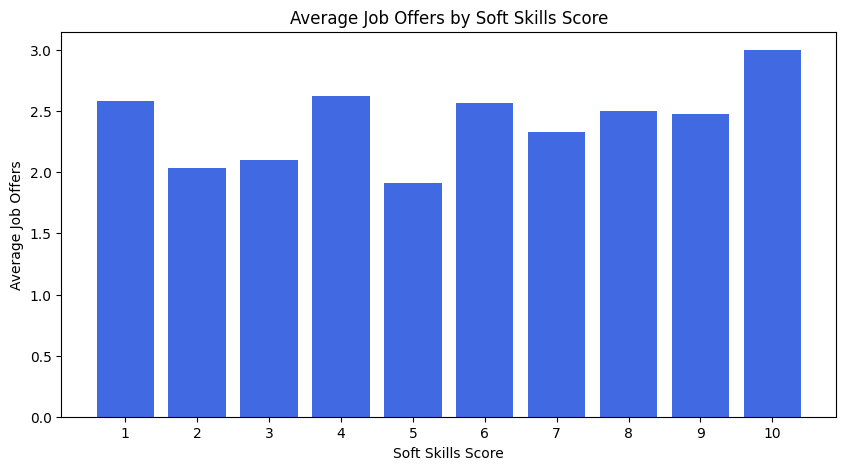

In [187]:
plt.figure(figsize=(10, 5))
plt.bar(soft_skills_vs_offers.index, soft_skills_vs_offers.values, color='royalblue')
plt.title('Average Job Offers by Soft Skills Score')
plt.xlabel('Soft Skills Score')
plt.ylabel('Average Job Offers')
plt.xticks(range(1, 11))  
plt.show()

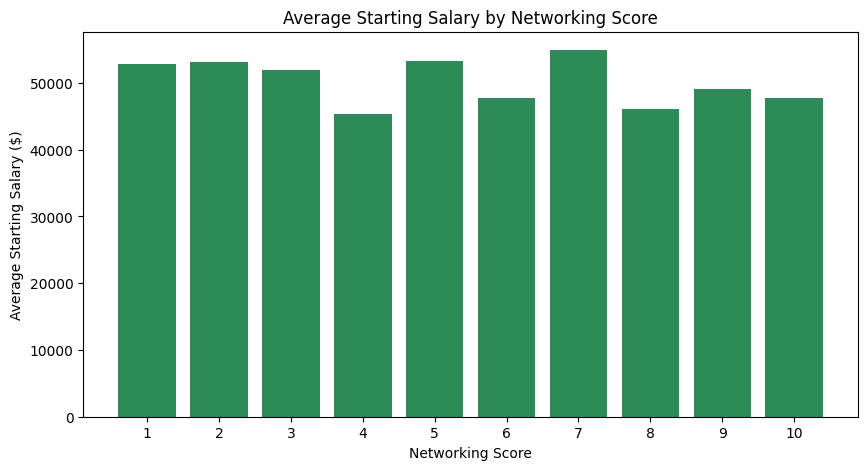

In [188]:
plt.figure(figsize=(10, 5))
plt.bar(networking_vs_salary.index, networking_vs_salary.values, color='seagreen')
plt.title('Average Starting Salary by Networking Score')
plt.xlabel('Networking Score')
plt.ylabel('Average Starting Salary ($)')
plt.xticks(range(1, 11))  # Scores range from 1 to 10
plt.show()

<Figure size 1000x500 with 0 Axes>

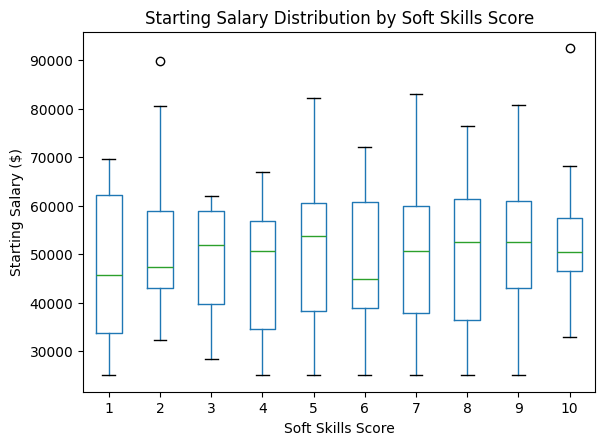

In [189]:
plt.figure(figsize=(10, 5))
ecs_sample_df.boxplot(column='Starting_Salary', by='Soft_Skills_Score', grid=False)
plt.title('Starting Salary Distribution by Soft Skills Score')
plt.xlabel('Soft Skills Score')
plt.ylabel('Starting Salary ($)')
plt.suptitle('')
plt.show()

<Figure size 1000x500 with 0 Axes>

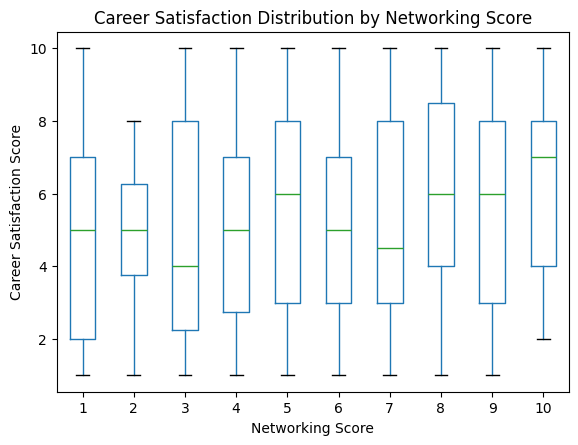

In [190]:
plt.figure(figsize=(10, 5))
ecs_sample_df.boxplot(column='Career_Satisfaction', by='Networking_Score', grid=False)
plt.title('Career Satisfaction Distribution by Networking Score')
plt.xlabel('Networking Score')
plt.ylabel('Career Satisfaction Score')
plt.suptitle('')
plt.show()